<a href="https://colab.research.google.com/github/Phanttan/DeepLearning-Miscellanious/blob/main/WordEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import tensorflow_datasets as tfds
import numpy as np

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from tensorflow.keras.layers import Embedding

from keras.layers import Flatten
from keras.layers import Dense

import matplotlib.pyplot as plt

import io

In [2]:
imdb, info  = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete10EOFT/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete10EOFT/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete10EOFT/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
train_data, test_data = imdb['train'], imdb['test']

In [59]:
train_sentences = []
test_sentences =[]

train_labels = []
test_labels=[]

for s, l in train_data:
  train_sentences.append(str(s.numpy()))
  train_labels.append(l.numpy())

for s,l in test_data:
  test_sentences.append(str(s.numpy()))
  test_labels.append(l.numpy())

In [5]:
train_sentences[0]

'b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."'

In [73]:
train_sentences, train_labels = np.array(train_sentences), np.array(train_labels)
test_sentences, test_labels = np.array(train_sentences), np.array(test_labels)
train_sentences.shape,  test_sentences.shape

((25000,), (25000,))

In [69]:
label_sentences

array([0, 0, 0, ..., 0, 0, 1])

In [130]:
# A typical sentence is 140-word length. We have two ways to represent it
# One-hot word vectors with vocabulary size equal 10000 words/ dimensions 
# Word Embeddings with 64 dimensions
# Matrix (140, 1000) x (1000, 64) = (140, 60)

vocab_size = 10000    # Maximum size of dictionary
embedding_dim = 64    # Hidden Layer dimension to describe a word
max_length = 140      # Max length of sentence

In [60]:
tokenizer = Tokenizer(num_words=vocal_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentences)

In [61]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)

In [62]:
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length, 
                                       truncating='post', padding='post')

In [56]:
padded_train_sequences.shape

(25000, 140)

In [64]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length ,
                                      padding='post', truncating='post')
padded_test_sequences.shape

(25000, 140)

In [137]:
def build_model():
  model = Sequential()
  model.add(Embedding(input_dim=vocal_size, output_dim=embedding_dim, 
                      input_length=max_length))
  model.add(Flatten())
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

  return model

model = build_model()
history = model.fit(padded_train_sequences, train_labels, epochs=20, 
          validation_data=(padded_test_sequences, test_labels))

Epoch 1/20
782/782 [==============================] - 14s 18ms/step - loss: 0.4397 - accuracy: 0.7835 - acc: 0.7835 - val_loss: 0.3678 - val_accuracy: 0.8359 - val_acc: 0.8359
Epoch 2/20
782/782 [==============================] - 14s 18ms/step - loss: 0.1266 - accuracy: 0.9582 - acc: 0.9582 - val_loss: 0.4868 - val_accuracy: 0.8078 - val_acc: 0.8078
Epoch 3/20
782/782 [==============================] - 13s 17ms/step - loss: 0.0136 - accuracy: 0.9980 - acc: 0.9980 - val_loss: 0.5705 - val_accuracy: 0.8168 - val_acc: 0.8168
Epoch 4/20
782/782 [==============================] - 13s 17ms/step - loss: 0.0016 - accuracy: 1.0000 - acc: 1.0000 - val_loss: 0.6236 - val_accuracy: 0.8192 - val_acc: 0.8192
Epoch 5/20
782/782 [==============================] - 13s 17ms/step - loss: 6.0769e-04 - accuracy: 1.0000 - acc: 1.0000 - val_loss: 0.6615 - val_accuracy: 0.8218 - val_acc: 0.8218
Epoch 6/20
782/782 [==============================] - 14s 18ms/step - loss: 3.0445e-04 - accuracy: 1.0000 - acc: 1.0

In [67]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 140, 64)           640000    
_________________________________________________________________
flatten_5 (Flatten)          (None, 8960)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                89610     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 729,621
Trainable params: 729,621
Non-trainable params: 0
_________________________________________________________________


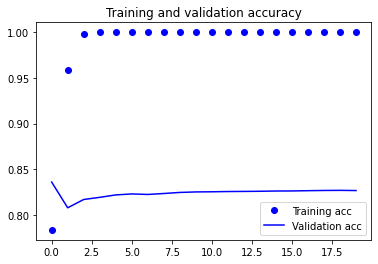

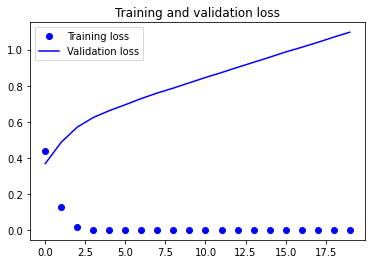

In [138]:
# Plot Loss and Accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

==> Overfitting

In [126]:
test_sen = ["I hate this movie so much"]
test_seq = tokenizer.texts_to_sequences(test_sen)
padded_test_sen = pad_sequences(test_seq, maxlen=max_length, padding='post', 
                              truncating="post")
padded_test_sen

array([[ 11, 797,  12,  18,  37,  77,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int32)

In [127]:
model.predict(padded_test_sen)

array([[0.12116101]], dtype=float32)

In [134]:
weights = model.layers[0].get_weights()[0]
weights.shape

(10000, 64)

In [ ]:
#https://projector.tensorflow.org/
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for idx in range(1, vocab_size):
  word = tokenizer.index_word[idx]
  vector = weights[idx]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vector]) + "\n")

out_m.close()
out_v.close()
